
<h3>Name:- Babin Joshi<br/>
    Roll No:- 19
</h3>

<center><h1>Getting Started With Python Machine Learning</h1></center>

<h1>Learning NumPy</h1>

In [1]:
import numpy

In [2]:
numpy.version.full_version

'1.19.2'

As we do not want to pollute our namespace, <b>we should not use the following code:</b>

In [3]:
from numpy import *

Because, for instance, numpy.array will potentially shadow the array package that is included in standard Python. Instead, we will use the following convenient shortcut:

In [4]:
import numpy as np

In [5]:
a = np.array([0,1,2,3,4,5])

In [6]:
a

array([0, 1, 2, 3, 4, 5])

In [7]:
a.ndim

1

In [8]:
a.shape

(6,)

In [9]:
b = a.reshape((3,2))

In [10]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
b.ndim

2

In [12]:
b.shape

(3, 2)

In [13]:
b[1][0] = 77

In [14]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [15]:
a

array([ 0,  1, 77,  3,  4,  5])

In [16]:
c = a.reshape((3,2)).copy()

In [17]:
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [18]:
c[0][0] = -99

In [19]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [20]:
a

array([ 0,  1, 77,  3,  4,  5])

In [21]:
d = np.array([1,2,3,4,5])

In [22]:
d * 2

array([ 2,  4,  6,  8, 10])

In [23]:
d ** 2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [24]:
[1,2,3,4,5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [25]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

<h1>Indexing</h1>

In [28]:
a

array([ 0,  1, 77,  3,  4,  5])

In [30]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [31]:
a > 4

array([False, False,  True, False, False,  True])

In [32]:
a[a>4]

array([77,  5])

By performing the following command, this can be used to trim outliers:

In [33]:
a[a>4] = 4

In [34]:
a

array([0, 1, 4, 3, 4, 4])

As this is a frequent use case, there is a special <b>clip</b> function used for clipping the values at bond ends of an interval

In [37]:
b = np.array([ 0,  1, 77,  3,  4,  5])

In [38]:
b

array([ 0,  1, 77,  3,  4,  5])

In [39]:
b.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [41]:
b

array([ 0,  1, 77,  3,  4,  5])

<h1>Handling nonexisting values</h1>

Numpy Indexing capabilites comes in handy when preprocessing data that we have just read in from a text file. Most likely, it will contain invalid values that will be marked using <b>numpy.NAN</b>:

In [42]:
c = np.array([1,2, np.NAN, 3, 4])

In [43]:
c

array([ 1.,  2., nan,  3.,  4.])

In [44]:
np.isnan(c)

array([False, False,  True, False, False])

In [45]:
c[~(np.isnan(c))]

array([1., 2., 3., 4.])

In [47]:
np.mean(c[~(np.isnan(c))])

2.5

<h1>Comparing the runtime</h1>

In [48]:
import timeit

In [49]:
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number = 10000)

In [50]:
naive_np_sec = timeit.timeit(
                'sum(na*na)',
                setup="import numpy as np; na = np.arange(1000)",
                number=10000
)

In [51]:
good_np_sec = timeit.timeit(
                'na.dot(na)',
                setup="import numpy as np; na=np.arange(1000)",
                number=10000
)

In [53]:
print(f"Normal Python: {normal_py_sec} sec")
print(f"Naive NumPy: {naive_np_sec} sec")
print(f"Good NumPy: {good_np_sec}")

Normal Python: 1.0034044999999878 sec
Naive NumPy: 1.6067939000001843 sec
Good NumPy: 0.02442839999980606


<b>Note: </b> We make two interesting observations. Firstly, by just using NumPy as data storage (Naive NumPy) takes 3.5 times longer, which is surprising since we believe it must be much faster as it is written as a C extension. One reason for this is that the access of individual elements from Python itself is rather costly. Only when we are able to apply algorithms inside the optimized extension code is when we get speed improvements. The other observation is quite a tremendous one: using the dot()function of NumPy, which does exactly the same, allows us to be more than 25 times faster.

However, using NumPy arrays has its drawbacks as we no longer have the incredible flexibility of Python lists, which can hold basically anything. NumPy arrays have only one data type.

In [54]:
a = np.array([1,2,3])

In [55]:
a.dtype

dtype('int32')

<b>Note: If we try to use elements of different types, such as the ones shown in the following code, NumPy will do its best to coerce them to be the most reasonable common data type such as:</b>  

In [56]:
np.array([1, 'stringy'])

array(['1', 'stringy'], dtype='<U11')

<h1>Learning SciPy</h1>

In [61]:
import scipy, numpy

In [58]:
scipy.version.full_version

'1.6.1'

In [62]:
scipy.dot is numpy.dot

False

The diverse algorithms are grouped into the following toolboxes:

![alt text](scipy1.png)

![alt text](scipy2.png)

<h1>Out first(tiny) application of machine learning</h1>

In [64]:
 import scipy as sp

In [65]:
data = sp.genfromtxt("web_traffic.tsv", delimiter='\t')

<ipython-input-65-0bfac29b600f>:1: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  data = sp.genfromtxt("web_traffic.tsv", delimiter='\t')


In [66]:
data

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       ...,
       [7.410e+02, 5.392e+03],
       [7.420e+02, 5.906e+03],
       [7.430e+02, 4.881e+03]])

In [67]:
len(data)

743

In [68]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [69]:
data.shape

(743, 2)

<h1>Preprocessing and cleaning the data</h1>

In [70]:
x = data[:, 0]
y = data[:, 1]

In [72]:
x[:5]

array([1., 2., 3., 4., 5.])

In [73]:
y[:5]

array([2272.,   nan, 1386., 1365., 1488.])

In [74]:
sp.sum(sp.isnan(y))

<ipython-input-74-d6e39c765d76>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  sp.sum(sp.isnan(y))
<ipython-input-74-d6e39c765d76>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(sp.isnan(y))


8

In [75]:
len(y[~(sp.isnan(y))])

<ipython-input-75-6f5cab7b2b04>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  len(y[~(sp.isnan(y))])


735

In [76]:
x = x[~(sp.isnan(y))]

<ipython-input-76-34a3830f2779>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  x = x[~(sp.isnan(y))]


In [77]:
y = y[~(sp.isnan(y))]

<ipython-input-77-a3a7b25033d7>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  y = y[~(sp.isnan(y))]


In [79]:
print(f"Length of x: {len(x)} and Length of y: {len(y)}")

Length of x: 735 and Length of y: 735


In [80]:
import matplotlib.pyplot as plt

In [81]:
%matplotlib inline`

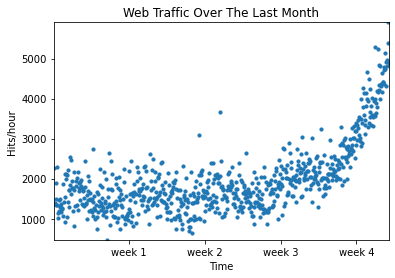

In [110]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

<h1>Choosing the right model and learning algorithm</h1>

<b>Note: </b>When we talk about models, we can think of them as simplified theoretical approximations of complex reality. As such there is always some inferiority involved, also called the approximation error. This error will guide us in choosing the right model among the myriad of choices we have. And this error will be calculated as the squared distance of the model's prediction to the real data;



In [111]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

The trained model is assumed to take a vector and return the results again as a vector of the same size so that we can use it to calculate the difference to y.

In [112]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

<ipython-input-112-176abcef6c22>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)


In [113]:
print(f"Model Parameters: {fp1}")

Model Parameters: [  2.59619213 989.02487106]


In [114]:
print(f"Residuals: {residuals}")

Residuals: [3.17389767e+08]


This means the best straight line fit is the following function:
f(x) = 2.59619213 * x + 989.02487106

We then use <b>poly1d()</b> to create a model function from the model parameters:

In [115]:
f1 = sp.poly1d(fp1)

In [116]:
print(f"{error(f1, x, y)}")

317389767.339778


<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


We can now use <b>f1()</b> to plot our first trained model. In addition to the preceding plotting instruction, we simply add the following code:

<ipython-input-119-5b6eae072e56>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


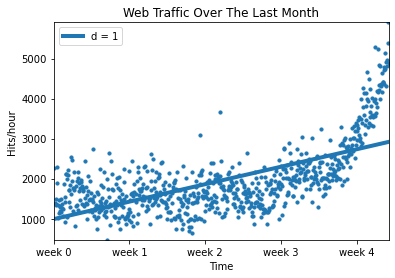

In [119]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4)
plt.legend(["d = %i" % f1.order], loc='upper left')

The absolute value of the error is seldom of use in isolation. However, when comparing two competing models, we can use their errors to judge which one of them is better.

<h1>Towards some advanced stuff</h1>

In [120]:
f2p = sp.polyfit(x, y, 2)

<ipython-input-120-5d6578798a8c>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f2p = sp.polyfit(x, y, 2)


In [121]:
print(f"{f2p}")

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [122]:
f2 = sp.poly1d(f2p)

In [123]:
print(f"{error(f2, x, y)}")

179983507.8781792


<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


The error is 179,983,507.878, which is almost half the error of the straight line model. This is good but unfortunately this comes with a price: We now have a more complex function, meaning that we have one parameter more to tune inside polyfit().
The fitted polynomial is as follows:<br/>
<b>f(x) = 0.0105322215 * x**2 - 5.26545650 * x + 1974.76082</b>

<ipython-input-128-c0cf18ea7208>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


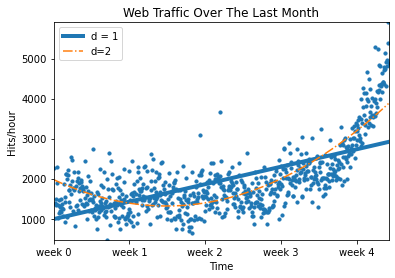

In [128]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4, label = 'd = 1')
plt.plot(fx, f2(fx), "-.", label='d=2')
plt.legend(loc='upper left')
# plt.legend(["d = %i" % f1.order], loc='upper left')



In [142]:
f3p = sp.polyfit(x, y, 3)
print(f"{f3p}")
f3 = sp.poly1d(f3p)
print(f"Error: {error(f3, x, y)}")

[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Error: 139350144.03172523


<ipython-input-142-ad85bafed78f>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f3p = sp.polyfit(x, y, 3)
<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [141]:
f10p = sp.polyfit(x, y, 10)
print(f"{f10p}")
f10 = sp.poly1d(f10p)
print(f"Error: {error(f10, x, y)}")

[-3.73981969e-22  1.36473757e-18 -2.14294407e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604589e-05  1.19167041e-02
 -9.41618607e-01  3.33703840e+01  1.26421204e+03]
Error: 121942326.36347426


<ipython-input-141-3eef983fc3c3>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f10p = sp.polyfit(x, y, 10)
<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [140]:
f53p = sp.polyfit(x, y, 53)
print(f"{f53p}")
f53 = sp.poly1d(f53p)
print(f"Error: {error(f53, x, y)}")

[-6.72759183e-140  1.19710158e-136 -4.66178296e-135 -4.66551759e-131
 -2.54200123e-128  2.26257602e-126  1.39011216e-122  1.16096943e-119
  4.32156530e-117 -1.50849864e-114 -3.76602032e-111 -3.20493820e-108
 -1.48603417e-105  6.29954206e-104  8.53560694e-100  9.11000534e-097
  5.56789708e-094  1.31793700e-091 -1.52878914e-088 -2.41373158e-085
 -1.84963280e-082 -7.30248729e-080  2.07994669e-077  6.26235839e-074
  5.60991108e-071  2.52851719e-068 -4.41920217e-066 -1.85478676e-062
 -1.62965678e-059 -5.76817640e-057  3.54982953e-054  6.50849471e-051
  3.79822849e-048 -4.37550438e-046 -2.48094822e-042 -1.57859957e-039
  3.46274086e-037  1.09205565e-033  3.34319227e-031 -4.93745914e-028
 -2.97738492e-025  2.64737510e-022  1.18873771e-019 -2.02258692e-016
  1.03625143e-013 -2.90542929e-011  4.79737959e-009 -4.21040813e-007
  5.98060236e-006  2.59218391e-003 -2.60192227e-001  1.03507297e+001
 -1.60104062e+002  2.14972779e+003]
Error: 109452413.42127776


<ipython-input-140-3a092de65a4d>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f53p = sp.polyfit(x, y, 53)
<ipython-input-140-3a092de65a4d>:1: RankWarning: Polyfit may be poorly conditioned
  f53p = sp.polyfit(x, y, 53)
<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


<ipython-input-139-2d2a60063b6d>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


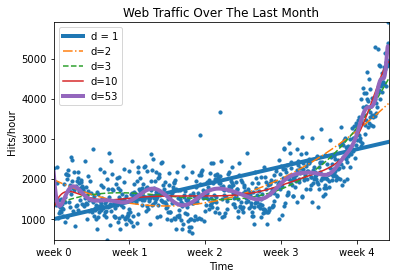

In [139]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4, label = 'd = 1')
plt.plot(fx, f2(fx), "-.", label='d=2')
plt.plot(fx, f3(fx), "--", label='d=3')
plt.plot(fx, f10(fx), label='d=10')
plt.plot(fx, f53(fx), linewidth=4, label='d=53')
plt.legend(loc='upper left')
# plt.legend(["d = %i" % f1.order], loc='upper left')


<h1>Stepping back to go forward - another look at our data</h1>

In [143]:
inflection = 3.5 * 7 * 24

In [146]:
inflection

588.0

In [147]:
xa = x[:int(inflection)]

In [148]:
ya = y[:int(inflection)]

In [149]:
xb = x[int(inflection):]

In [150]:
yb = y[int(inflection):]

In [151]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))

<ipython-input-151-72eedc27a705>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fa = sp.poly1d(sp.polyfit(xa, ya, 1))


In [152]:
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

<ipython-input-152-5e6fec40c184>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fb = sp.poly1d(sp.polyfit(xb, yb, 1))


In [153]:
fa_error = error(fa,xa,ya)

<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [154]:
fb_error = error(fb,xb,yb)

<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [155]:
print(f"Error inflection: {fa_error +  fb_error}")

Error inflection: 132950348.1976164


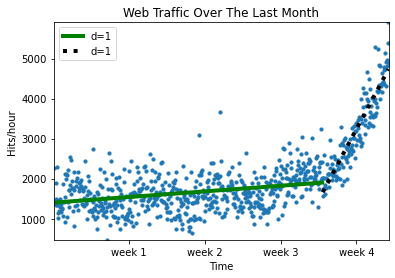

In [198]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

# fx = sp.linspace(0, x[-1], 1000)
# plt.plot(fx, f1(fx), linewidth = 4, label = 'd = 1')
plt.plot(xa, fa(xa), linewidth = 4, label='d=1', color='green')
plt.plot(xb, fb(xb),':', linewidth = 4, label='d=1', color='black')
plt.legend(loc='best')

<h1>Testing and Training</h1>

In [191]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

In [193]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train],2))

<ipython-input-193-44dac7ff151e>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
<ipython-input-193-44dac7ff151e>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train],2))


In [194]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))

<ipython-input-194-979d06bd2992>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
<ipython-input-194-979d06bd2992>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))


In [195]:
print(f"fbt2(x) = {fbt2}")
print(f"fbt2(x)-100,000={fbt2-100000}")

fbt2(x) =          2
0.08242 x - 89.15 x + 2.577e+04
fbt2(x)-100,000=         2
0.08242 x - 89.15 x - 7.423e+04


In [199]:
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

<ipython-input-199-1ac764ec3a9e>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
<ipython-input-199-1ac764ec3a9e>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
<ipython-input-199-1ac764ec3a9e>:2: RankWarning: Polyfit may be poorly conditioned
  fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
<ipython-input-199-1ac764ec3a9e>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.p

In [200]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt53]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))


Test errors for only the time after inflection point
Error d=1: 7251023.787773
Error d=2: 6728694.703948
Error d=3: 6955394.155167
Error d=10: 8143988.740457
Error d=53: 11927629.432163


<ipython-input-111-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [204]:
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print(f"fbt2(x)={fbt2}")

fbt2(x)=         2
0.08242 x - 89.15 x + 2.577e+04


<ipython-input-204-7434542f7872>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))


In [205]:
print(f"fbt2(x)-100,000={fbt2-100000}")

fbt2(x)-100,000=         2
0.08242 x - 89.15 x - 7.423e+04


In [206]:
from scipy.optimize import fsolve

In [207]:
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)

In [208]:
print(f"100,000 hits/hour expected at week {reached_max[0]}")

100,000 hits/hour expected at week 9.72128526244397
